In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from collections import defaultdict
import logging
from sklearn.metrics import accuracy_score

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })

from classic_algos import brute_force, knapsack01_dpV, fptas, greedy, simann_knapsack
from largeN_algo import zero_one_algorithm

import math
import time

## Algorithm Comparisons

Notebook code for comparing the time and accuracy of various algorithms to solve the 0-1 Knapsack problem. 

Compared algorithms

- **Brute Force:**(`brute_force`) Involves listing all possible combinations of items, computing the total weights and total values of each combination and selecting the combination with the highest value with a weight below the stated limit. 

- **Dynamical Programming Solution:**(`knapsack_dpV`)  Standard iterative solution to the problem which involves storing sub-problem solutions in matrix elements

- **Fully Polynomial Time Approximate Solution (FPTAS):**(`fptas`)  Algorithm that is polynomial time in the number of elements and which has a tunable accuracy

- **Greedy Algorithm:**(`greedy`)  Involves computing the ratio of weights to volumes for each object and filling in the collection until the max weight is reached. 

- **Simulated Annealing:**(`simannl_knapsack`)   Involves representing the system computationally as a statistical physics one and then "annealing" the system to low temperatures. 

- **Large N Algorithm:**(`zero_one_algorithm`)  Algorithm based on statistical physics representation of the system

### Main Calculation

We now investigate how these accuracies vary as we change the number of items. We will ignore the brute force algorithm since it is so slow and take the dynamical programming solution to be our baseline of comparison (because it is exact). 

In [2]:
# dictionary of algorithm names and functions
algo_name_dict = {
                    'DP': knapsack01_dpV,  
                    'Brute': brute_force,  
                    'FPTAS': fptas,
                    'Greedy': greedy,
                    'Annealing': simann_knapsack,
                    'Large N': zero_one_algorithm
                 }


for k, v in algo_name_dict.items():
    print(k)

DP
Brute
FPTAS
Greedy
Annealing
Large N


In [3]:
# max power
power = 11

# print intermediate results
verbose = True

# number of elements
nelem_list = [2**k for k in range(3, power)]

# defining default dictionaries
time_list_name_dict = defaultdict(lambda: list())
v_ratio_list_name_dict = defaultdict(lambda: list())
limit_list = list()
limit_sat_list_name_dict = defaultdict(lambda: list())

# start clock
start_clock0 = time.time()

for m in range(len(nelem_list)):
    
    # getting element
    nelem = nelem_list[m]
    
    # set seed
    np.random.seed(42)

    # Randomly choose the weight of each object
    weight_vec = np.random.randint(1,100,nelem)
    value_vec = np.random.randint(1,100,nelem)
    
    # Defining Weight Limit as the average of the weights of 
    # randomly chosen objects
    empt_list = []
    for _ in range(10):
        empt_list.append(np.dot(np.random.randint(0,2,nelem), weight_vec))
    Wlimit = int(np.mean(empt_list))    

    limit_list.append(Wlimit)
    
    if verbose:
        print('## N = %s' % str(nelem))
        print('## Weight Limit: %.3f' % Wlimit)
        print('---')
        print('---')
              
    
    for name, algo in algo_name_dict.items():
        # don't run brute force for elements greater than 23
        if nelem > 16 and name == 'Brute':
            continue

        # finding solution and computing time    
        start_clock = time.time()
        soln = algo(weights = weight_vec, values = value_vec, limit = Wlimit)
        time_list_name_dict[name].append(time.time()-start_clock)        
    
        if name == 'DP':
            true_value = np.dot(soln, value_vec)

        # adding accuracy 
        v_ratio_list_name_dict[name].append(np.dot(soln, value_vec)/true_value)  
        limit_sat_list_name_dict[name].append(np.dot(soln, weight_vec)<Wlimit)  
        
        if verbose: 
            print('%s V_soln/V_exact: %.3f' % (name, np.dot(soln, value_vec)/true_value))
            print('%s Weight: %.3f' % (name, np.dot(soln, weight_vec)))
            print('%s computation time: %.3f' % (name, time_list_name_dict[name][-1]))
            print('---')
            
    if verbose: 
        print('Done with Round #%i!' % (m+1))
        print('Total elapsed ime so far: %.3f sec' % (time.time()-start_clock0))
        print('')
        print('')

## N = 8
## Weight Limit: 287.000
---
---
DP V_soln/V_exact: 1.000
DP Weight: 264.000
DP computation time: 0.002
---
Brute V_soln/V_exact: 1.000
Brute Weight: 264.000
Brute computation time: 0.001
---
FPTAS V_soln/V_exact: 1.000
FPTAS Weight: 264.000
FPTAS computation time: 0.001
---
Greedy V_soln/V_exact: 1.000
Greedy Weight: 264.000
Greedy computation time: 0.000
---
Stopping annealing because error tolerance was reached
Annealing V_soln/V_exact: 0.837
Annealing Weight: 284.000
Annealing computation time: 0.190
---
Large N V_soln/V_exact: 1.000
Large N Weight: 264.000
Large N computation time: 0.001
---
Done with Round #1!
Total elapsed ime so far: 0.196 sec


## N = 16
## Weight Limit: 416.000
---
---
DP V_soln/V_exact: 1.000
DP Weight: 403.000
DP computation time: 0.005
---
Brute V_soln/V_exact: 1.000
Brute Weight: 403.000
Brute computation time: 0.531
---
FPTAS V_soln/V_exact: 1.000
FPTAS Weight: 403.000
FPTAS computation time: 0.004
---
Greedy V_soln/V_exact: 1.000
Greedy Weight:

## Plots

### Accuracy vs $N$

In [4]:
# dictionary of algorithm names and functions
marker_name_dict = {
                  'Brute': 'D',  
                    'DP': 's',  
                    'FPTAS': 'X',
                 'Greedy': 'o',
                 'Annealing': '^',
                 'Large N': 'P'}

# dictionary of algorithm names and functions
color_name_dict = {
                  'Brute': 'slategrey',  
                    'DP': 'purple',  
                    'FPTAS': 'blue',
                 'Greedy': 'green',
                 'Annealing': 'darkorange',
                 'Large N': 'red'}

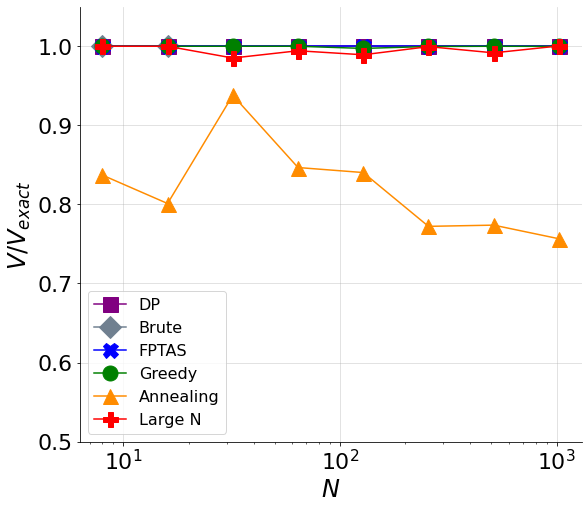

In [17]:
plt.figure(figsize = (9,8))

ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for name, v_ratio in v_ratio_list_name_dict.items():
    if name == 'Brute':
        nums = [8, 16]
        
        plt.plot(nums, v_ratio, marker = marker_name_dict[name], color = color_name_dict[name], linestyle = '-',  markersize = 15, label = r'%s' % name)
    else:
        nums = nelem_list
        plt.plot(nums, v_ratio, marker = marker_name_dict[name], color = color_name_dict[name], linestyle = '-', label = r'%s' % name, markersize = 15)


# plt.plot(nelem_list, accuracies_lgN, 'o-', label = 'DP')

plt.grid(alpha = 0.45)
plt.xlabel(r'$N$', fontsize = 24)
plt.xscale('log')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylabel(r'$V/V_{exact}$', fontsize = 24)
plt.legend(loc = 'best', fontsize = 16)

plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/arxiv_submission/vratio_vs_num_easykp0.png', bbox_inches = 'tight', format='png')

plt.ylim([.5, 1.05])

plt.show()

### Time vs $N$

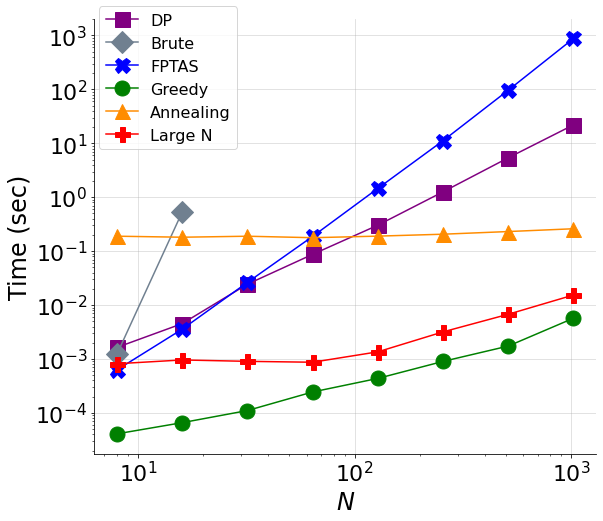

In [18]:
# plt.plot(nelem_list, accuracies_fptas, '.-')
# plt.plot(nelem_list, [1]*len(nelem_list), 'o-', label = 'DP')

plt.figure(figsize = (9,8))

ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for name, time_ in time_list_name_dict.items():
    if name == 'Brute':
        nums = [8, 16]
        
        plt.loglog(nums, np.array(time_), marker_name_dict[name], color = color_name_dict[name],linestyle = '-',  markersize = 15, label = r'%s' % name)
    else:
        nums = nelem_list
        plt.loglog(nums, np.array(time_), marker_name_dict[name], color = color_name_dict[name],linestyle = '-', label = r'%s' % name, markersize = 15)


plt.grid(alpha = 0.45)
plt.xlabel(r'$N$', fontsize = 24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylabel(r'Time (sec)', fontsize = 24)
plt.legend(loc = (.01,.7), fontsize = 16)

plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/arxiv_submission/time_vs_num_easykp0.png', bbox_inches = 'tight', format='png')

plt.show()

# plt.ylim([0, 1.03])

### Rate vs Accuracy

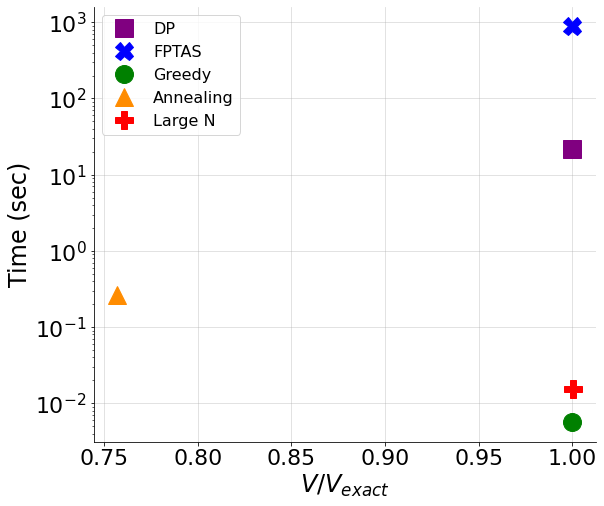

In [19]:
## accuracy-time scatter plot

plt.figure(figsize = (9,8))

ax = plt.subplot(111)

for name, _ in v_ratio_list_name_dict.items():
    v_ratio = v_ratio_list_name_dict[name][-1]
    time_ = time_list_name_dict[name][-1]
    if name == 'Brute':
        continue
    else:

        plt.plot([v_ratio], [time_], marker_name_dict[name], color = color_name_dict[name], label = r'%s' % name, markersize = 18)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.grid(alpha = 0.45)
plt.xlabel(r'$V/V_{exact}$', fontsize = 24)
plt.yscale('log')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylabel(r'Time (sec)', fontsize = 24)
plt.legend(loc ='best', fontsize = 16)

plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/arxiv_submission/time_vs_vratio_easykp0.png',bbox_inches = 'tight',  format='png')

plt.show()

# plt.ylim([0, 1.03])